In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
#**1、读取数据并查看前5行以及数据均值、中位数等统计量。（2分）
data = pd.read_excel("客户信息.xlsx")
print(data.head())
data.describe()

   年龄(岁)  收入(万元)
0     50      66
1     44      51
2     30      56
3     46      50
4     32      50


,年龄(岁),收入(万元)
count,112.000000,112.000000
mean,37.187500,43.625000
std,8.048872,16.220955
min,21.000000,15.000000
25%,30.000000,27.750000
50%,37.500000,48.500000
75%,44.000000,54.250000
max,52.000000,74.000000


Text(0, 0.5, '收入(万元)')

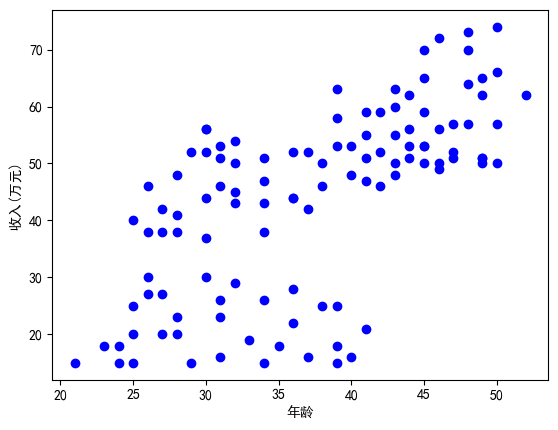

In [8]:
#**2、EDA分析：可视化展示并形成分析结论（5分）
plt.scatter(data["年龄(岁)"],data["收入(万元)"],c="blue")
plt.xlabel("年龄")
plt.ylabel("收入(万元)")

In [9]:
#**3、数据建模：选择合适的模型建模训练，并选用合适的指标评估模型。（8分）
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300)
X = data.values
kmeans.fit(X)
score = silhouette_score(X,kmeans.labels_)
print(f"silhouette_score{score}")

silhouette_score0.5843364806986523


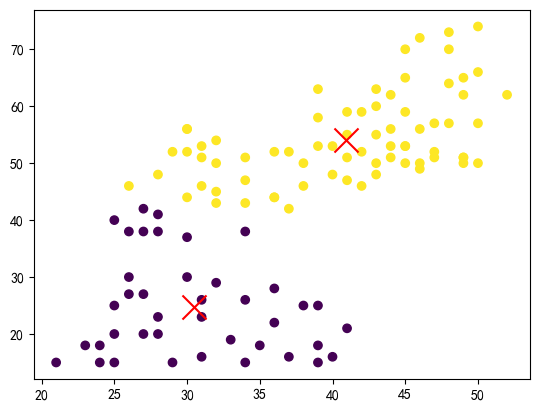

In [15]:
#**4、建模效果可视化展示（5分）
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="x",s=300,c="red")
plt.show()

In [16]:
#**5、使用模型对样本分群，对样本每条数据打上分群后的标签（如高净值、低净值）（5分）
data["C"] = kmeans.labels_
data["C_label"] = data["C"].map({0:"高净值",1:"低净值"})
data

,年龄(岁),收入(万元),C,C_label
0,50,66,1,低净值
1,44,51,1,低净值
2,30,56,1,低净值
3,46,50,1,低净值
4,32,50,1,低净值
...,...,...,...,...
107,30,30,0,高净值
108,32,29,0,高净值
109,24,18,0,高净值
110,24,15,0,高净值
